In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [10, 10]

In [8]:
kospi = pd.read_csv('./static/data/stock/KOSPI.csv', sep=',', encoding='utf8')
# kospi.기업명 = kospi.기업명.str.strip()
# kospi.업종코드 = kospi.업종코드.map('{:06d}'.format)
kospi.head()

,종목코드,종목명,현재가,대비,등락률(%),매도호가,매수호가,거래량(주),거래대금(원),시가,고가,저가,액면가,통화구분,상장주식수(주),상장시가총액(원),총카운트
0,095570,AJ네트웍스,"4,590",30,0.66,"4,600","4,590","954,168","4,501,998,395","4,735","4,950","4,585","1,000",원(KRW),"46,822,295","214,914,334,050",917.0
1,006840,AK홀딩스,"25,200","-1,350",5.08,"25,300","25,200","151,212","3,841,573,650","26,200","26,200","25,050","5,000",원(KRW),"13,247,561","333,838,537,200",NaN
2,027410,BGF,"4,800",0,0.00,"4,805","4,800","1,732,415","8,326,782,480","4,760","4,885","4,720","1,000",원(KRW),"95,716,791","459,440,596,800",NaN
3,282330,BGF리테일,"128,000","-4,000",3.03,"128,500","128,000","83,994","10,859,013,000","133,500","134,000","127,500","1,000",원(KRW),"17,283,906","2,212,339,968,000",NaN
4,138930,BNK금융지주,"5,780",-60,1.03,"5,790","5,780","2,921,745","17,021,223,100","5,870","5,890","5,770","5,000",원(KRW),"325,935,246","1,883,905,721,880",NaN


In [9]:
kospi = pd.read_csv('./static/data/stock/KOSPI.csv', sep=',', encoding='utf8', dtype={'업종코드':str})
kospi_dict = {}
for index in kospi.index:
    kospi_dict[kospi['종목코드'][index]] = kospi['종목명'][index] 
print(kospi_dict)

{'095570': 'AJ네트웍스', '006840': 'AK홀딩스', '027410': 'BGF', '282330': 'BGF리테일', '138930': 'BNK금융지주', '001460': 'BYC', '001465': 'BYC우', '001040': 'CJ', '079160': 'CJ CGV', '00104K': 'CJ4우(전환)', '000120': 'CJ대한통운', '011150': 'CJ씨푸드', '011155': 'CJ씨푸드1우', '001045': 'CJ우', '097950': 'CJ제일제당', '097955': 'CJ제일제당 우', '000590': 'CS홀딩스', '012030': 'DB', '016610': 'DB금융투자', '005830': 'DB손해보험', '000990': 'DB하이텍', '000995': 'DB하이텍1우', '139130': 'DGB금융지주', '001530': 'DI동일', '004840': 'DRB동일', '155660': 'DSR', '069730': 'DSR제강', '017940': 'E1', '007700': 'F&F', '114090': 'GKL', '078930': 'GS', '006360': 'GS건설', '001250': 'GS글로벌', '007070': 'GS리테일', '078935': 'GS우', '012630': 'HDC', '039570': 'HDC아이콘트롤스', '089470': 'HDC현대EP', '294870': 'HDC현대산업개발', '011200': 'HMM', '082740': 'HSD엔진', '003560': 'IHQ', '175330': 'JB금융지주', '234080': 'JW생명과학', '001060': 'JW중외제약', '001067': 'JW중외제약2우B', '001065': 'JW중외제약우', '096760': 'JW홀딩스', '105560': 'KB금융', '002380': 'KCC', '009070': 'KCTC', '009440': 'KC그린홀딩스', '119650'

In [11]:
kosdaq = pd.read_csv('./static/data/stock/KOSDAQ.csv', sep=',', encoding='utf8', usecols=['종목명','종목코드'])
# kosdaq.종목명 = kosdaq.종목명.str.strip()
# kosdaq.종목코드 = kosdaq.종목코드.map('{:06d}'.format)
kosdaq.head()

,종목코드,종목명
0,060310,3S
1,054620,APS홀딩스
2,265520,AP시스템
3,211270,AP위성
4,035760,CJ ENM


In [13]:
kosdaq = pd.read_csv('./static/data/stock/KOSDAQ.csv', sep=',', encoding='utf8', dtype={'업종코드':str})
kosdaq_dict = {}
for index in kosdaq.index:
    kosdaq_dict[kosdaq['종목코드'][index]] = kosdaq['종목명'][index] 
print(kosdaq_dict)

328380': '미래에셋대우스팩3호', '333430': '미래에셋대우스팩4호', '100790': '미래에셋벤처투자', '049950': '미래컴퍼니', '213090': '미래테크놀로지', '207760': '미스터블루', '059090': '미코', '214610': '미코바이오메드', '201490': '미투온', '950190': '미투젠', '214180': '민앤지', '206640': '바디텍메드', '018700': '바른손', '035620': '바른손이앤에이', '064520': '바른전자', '053030': '바이넥스', '301300': '바이브컴퍼니', '064550': '바이오니아', '208710': '바이오로그디바이스', '142760': '바이오리더스', '086820': '바이오솔루션', '038460': '바이오스마트', '086040': '바이오톡스텍', '032980': '바이온', '043150': '바텍', '323990': '박셀바이오', '267790': '배럴', '046310': '백금T&A', '036620': '버추얼텍', '066410': '버킷스튜디오', '206400': '베노홀딩스', '019010': '베뉴지', '177350': '베셀', '299910': '베스파', '225530': '보광산업', '250000': '보라티알', '006910': '보성파워텍', '226340': '본느', '014470': '부방', '008470': '부스타', '100120': '뷰웍스', '337930': '브랜드엑스코퍼레이션', '066980': '브레인콘텐츠', '064480': '브리지텍', '288330': '브릿지바이오테라퓨틱스', '251630': '브이원텍', '018290': '브이티지엠피', '263920': '블러썸엠앤씨', '033560': '블루콤', '126340': '비나텍', '121800': '비덴트', '148140': '비디아이', '082800': '비보존 헬스케어'

In [15]:
park = pd.read_csv('./static/data/seoul/공원 위치, 면적, 인구.csv',  index_col='공원명', encoding='utf8')
park.head()

,Unnamed: 0,지역,공원주소,area,공원개요,lat,lng,scale,size
공원명,,,,,,,,,
남산도시자연공원,0,중구,서울특별시 중구 삼일대로 231(예장동),5793774.0,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,37.555633,126.992218,대형,15
길동생태공원,1,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),80683.0,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,37.539066,127.153329,소형,3
서울대공원,2,과천시,경기도 과천시 대공원광장로 102,9132690.0,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,37.436431,127.014098,대형,15
서울숲,3,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),480994.0,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,37.543070,127.041799,중형,7
월드컵공원,4,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085.0,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,37.572327,126.881889,대형,15


In [16]:
import folium

In [17]:
park_name = '남산도시자연공원'

In [18]:
selected = park[park.index == park_name]
rest = park[park.index != park_name]

selected.index[0]

'남산도시자연공원'

In [19]:
selected['지역'][0]

'중구'

In [20]:
selected['공원개요'][0]

'남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃구경 공연관람 서울타워 남산케이블카 이용 등 다양한 활동이 가능한 대표적 휴식 여가 생활의 중심지입니다.'

In [21]:
selected['area'][0]

5793774.0

In [27]:
mapping = folium.Map([37.5502, 126.982], zoom_start=11)

for i in selected.index:
    folium.CircleMarker( [selected.lat[i], selected.lng[i]] , radius = float(selected['size'][i]) , color = 'green', fill_color = 'green').add_to(mapping)

mapping

In [24]:
gu_mapping = park[park['지역'] == '중구']
gu_mapping

,Unnamed: 0,지역,공원주소,area,공원개요,lat,lng,scale,size
공원명,,,,,,,,,
남산도시자연공원,0,중구,서울특별시 중구 삼일대로 231(예장동),5793774.0,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,37.555633,126.992218,대형,15
훈련원근린공원,14,중구,서울특별시 중구 을지로 227,16734.6,이곳 훈련원 터는 병사의 무술훈련 및 병서?전투대형 등의 강습을 맡았던 훈련원이 있...,37.566929,127.004389,소형,3
손기정체육공원,86,중구,서울특별시 중구 손기정로 101,29682.2,옛 양정 중.고등학교를 이전후 87년에 만들었다. 양정 중.고등학교는 손기정 선수의...,37.555480,126.964816,소형,3
문화역 서울284,119,중구,서울특별시 중구 통일로 1 서울역,0.0,누구에게나 열려있는 역동적이고 개방된 복합문화공간입니다. 대한민국 근현대사의 주요무...,37.556058,126.972116,소형,3
서울로7017,131,중구,서울 중구 퇴계로 33,0.0,서울로7017은 70년대 준공된 서울역 고가가 안전에 문제점이 도출되면서 철거가 될...,37.557546,126.976608,소형,3


In [28]:
gu_mapping.area.count()

5

In [29]:
'{:,}'.format(gu_mapping.area.mean())

'1,168,038.16'

In [30]:
gu_mapping.lat.mean()

37.558329153411805

In [32]:
mapping = folium.Map( [gu_mapping.lat.mean(), gu_mapping.lng.mean()], zoom_start= 12)

for i in gu_mapping.index:

    folium.CircleMarker( [gu_mapping.lat[i], gu_mapping.lng[i]] , radius = float(gu_mapping['size'][i]) , color = 'green', fill_color = 'green').add_to(mapping)

mapping

In [33]:
park_gu = pd.read_csv('./static/data/seoul/구 공원.csv',index_col='지역')
park_gu.head()

,공원면적,공원수,구면적,공원면적비율,인구수,인당공원면적,주거환경만족도,인당공원면적비율,초미세먼지,오차
지역,,,,,,,,,,
강남구,3626398.50,7,39500000.0,9.180756,544085,6.665132,6.40,1.036262,24.583333,0.218988
강동구,1526389.30,7,24590000.0,6.207358,462275,3.301908,6.09,0.513364,26.333333,1.469935
강북구,3714902.40,4,23600000.0,15.741112,313550,11.847879,6.20,1.842049,24.416667,0.250897
강서구,2194154.10,9,41440000.0,5.294773,589536,3.721832,6.11,0.578652,25.833333,0.951189
관악구,10431453.08,2,29570000.0,35.277149,514555,20.272766,6.71,3.151909,25.916667,1.650396


In [35]:
park_gu = pd.read_csv('./static/data/seoul/공원 위치, 면적, 인구.csv'
#,index_col='지역')
)
park_gu.head()

,Unnamed: 0,공원명,지역,공원주소,area,공원개요,lat,lng,scale,size
0,0,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),5793774.0,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,37.555633,126.992218,대형,15
1,1,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),80683.0,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,37.539066,127.153329,소형,3
2,2,서울대공원,과천시,경기도 과천시 대공원광장로 102,9132690.0,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,37.436431,127.014098,대형,15
3,3,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),480994.0,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,37.543070,127.041799,중형,7
4,4,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085.0,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,37.572327,126.881889,대형,15


In [44]:
crime = pd.read_csv('./static/data/seoul/구별 상대비교_5대범죄.csv'
,index_col='구별'
)
crime.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄 총합,검거율 총합,검거율 총합 상대비교,범죄 총합 상대비교
구별,,,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,480.252101,114.285714,125.000000,70.561056,90.874159,159842,1471,1.620591,880.973031,100.000000,44.779484
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544,1.557245,324.955196,36.885941,43.029139
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,133.333333,100.000000,54.454454,89.538310,244953,2063,1.054975,464.458451,52.721075,29.150620
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,111.111111,83.333333,52.680412,87.230990,302695,2679,1.215161,406.536298,46.146282,33.576809
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,125.000000,53.760000,85.536967,361923,1581,1.680980,425.652278,48.316153,46.448131


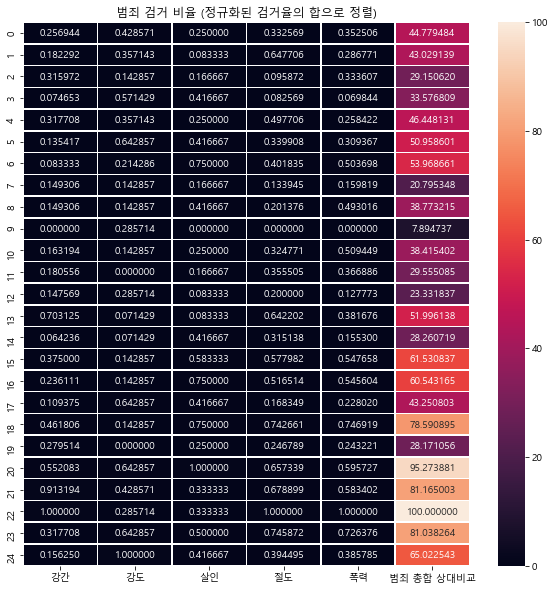

In [42]:
col = ['강간','강도','살인','절도','폭력','범죄 총합 상대비교']

sns.heatmap(crime[col] , annot = True, fmt = 'f', linewidths = .5)

plt.title('범죄 검거 비율 상대비교 (정규화된 검거율의 합으로 정렬)')
plt.show()

In [38]:
police_loc = pd.read_csv('./static/data/seoul/서울 경찰서 위도, 경도.csv'
#,index_col='구별')
)
police_loc

,Unnamed: 0,관서명,lat,lng
0,0,서울중부서경찰서,37.563647,126.989580
1,1,서울종로서경찰서,37.575558,126.984867
2,2,서울남대문서경찰서,37.554758,126.973498
3,3,서울서대문서경찰서,37.564785,126.966776
4,4,서울혜화서경찰서,37.571853,126.998914
5,5,서울용산서경찰서,37.541121,126.967694
6,6,서울성북서경찰서,37.589748,127.016135
7,7,서울동대문서경찰서,37.585061,127.045768
8,8,서울마포서경찰서,37.550814,126.954028
9,9,서울영등포서경찰서,37.515318,126.905728
